In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widjets
%matplotlib inline

import numpy as np
import collections

from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt

import math
import os
import shutil
import cv2
from pathlib import Path
from copy import deepcopy
import random

from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from time import time
from tqdm.notebook import tqdm

from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn import metrics
import json

from scipy.stats import multivariate_normal
from PIL import Image, ImageDraw, ImageFont
import pathlib

In [2]:
ROOT = Path("/usr/share/fonts/")
ALL_FONTS = sorted(ROOT.glob("*.jpg"))
print(f'found {len(ALL_FONTS)} ащтеы')

NameError: name 'ALL_IMAGES' is not defined

In [3]:
char_lib = [x for x in '.0123456789']

13


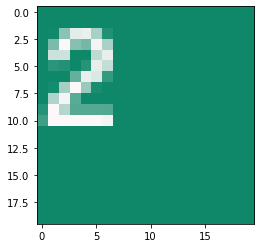

In [4]:
def draw_one_char(image_size=(20,20), 
                  font_size_init=20, 
                  font_path="fonts/arial.ttf",
                  different_sizes = False):
    
    if different_sizes:
        font_size = np.random.randint(font_size_init*0.6, font_size_init)
    else:
        font_size = font_size_init
    print(font_size)
    assert font_size -2 <= image_size[1], 'image_size too small'
    
    
    background_color = tuple(np.random.randint(200, size=(3)))
    text_color = tuple(np.random.randint(230, high=255, size=(3), dtype=int))

    font = ImageFont.truetype(font_path, font_size)
    image = Image.new('RGB', image_size, color = background_color)
    char_to_draw = char_lib[np.random.randint(len(char_lib)-1)]
    (char_width, char_height) = font.getsize(char_to_draw)

    x_coord = np.random.randint(image_size[0] - char_width)
    #рисует смещенным на 2-3 пикселя по Y
    if (image_size[1] - char_height) > 0 :
        y_coord = np.random.randint(image_size[1] - char_height) - 2
    else:
        y_coord = -2
    draw = ImageDraw.Draw(image)
    draw.text((x_coord, y_coord), 
              char_to_draw, 
              fill=text_color, 
              font=font,
             stroke_width=0) 

    return image

image = draw_one_char(image_size=(20,20),font_size_init=20, font_path='fonts/Tulia_bold.otf',
                      different_sizes=True)
plt.imshow(image)

In [5]:
font = ImageFont.truetype('fonts/Tulia_bold.otf', 20)
font

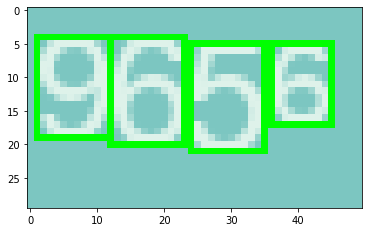

In [17]:
def draw_many_chars(
    image_size=(50,30),
    font_size_init=25,
    char_num = 4,
    font_path="fonts/arial.ttf",
    different_sizes = False,
    different_coords = False,
    different_colors = False,
    black_chars = False,
    false_targets = False
):
    
    to_draw = random.choices(char_lib, k=char_num)
    
    if black_chars:
        background_color = tuple(np.random.randint(50,255, size=(3)))
        text_low, text_high = 0, 40
    else:
        background_color = tuple(np.random.randint(200, size=(3)))
        text_low, text_high = 220, 255

    image = Image.new('RGB', image_size, color = background_color)
    draw = ImageDraw.Draw(image)
    
    text_color = tuple(np.random.randint(text_low, high=text_high, size=(3), dtype=int))
    
    bboxes = []
    for i in range(char_num):
        if different_colors:
            text_color = tuple(np.random.randint(text_low, high=text_high, size=(3), dtype=int))
            
        char_to_draw = to_draw[i]
        
        if different_sizes:
            font_size = np.random.randint(font_size_init*0.75, font_size_init)
            if i==0:
                x_start = np.random.randint(image_size[1]*0.2)
        else:
            font_size = font_size_init
            if i==0:
                x_start = 0
                
        font = ImageFont.truetype(font_path, font_size)

        (char_width, char_height) = font.getsize(char_to_draw)
        
        if different_coords:
            x_bias = np.random.randint(max(1, char_width*0.2))
            
            y_bias = np.random.randint(max(1, (image_size[1] - char_height)*0.2))
#             print(image_size[1], char_height)
        else:
            x_bias = 0
            y_bias = 0
        
        ######## define start pos for char #######
        if i>0:
            last_char_x1 = bboxes[-1][2]
            # break condition
            if last_char_x1 >= image_size[0]:
                break
            
            x_start = last_char_x1 + x_bias
        
            
        y_start = 0 + y_bias
        
        ######### define bbox ##############
        mask = font.getmask(char_to_draw)
        mask=np.array(mask).reshape(mask.size[::-1])
        coords_of_char = np.where(mask!=0)
        y_min_mask, y_max_mask = coords_of_char[0].min(), coords_of_char[0].max()
        x_min_mask, x_max_mask = coords_of_char[1].min(), coords_of_char[1].max()

        x_offset, y_offset = font.getoffset(char_to_draw)

        x0 = x_start + x_offset + x_min_mask
        y0 = y_start + y_offset + y_min_mask
        x1 = x_start + x_offset + x_max_mask
        y1 = y_start + y_offset + y_max_mask

        bbox = [x0, y0, x1, y1, char_to_draw]
        bboxes.append(bbox)
        
        ############# DRAW char ############
        draw.text((x_start, y_start),
                  char_to_draw, 
                  fill=text_color, 
                  font=font)
        last_char_width = char_width
        
    return image, bboxes


image, bboxes = draw_many_chars(different_coords=True, different_sizes = True, black_chars=False)
plt.imshow(image)

#image.save('pil_text.png')
image1 = np.array(image)
for bbox in bboxes:
    image1 = cv2.rectangle(image1, 
                           (bbox[0],bbox[1]), 
                           (bbox[2],bbox[3]), (0,255,0), thickness=1)
plt.imshow(image1)

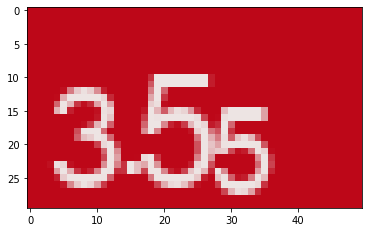

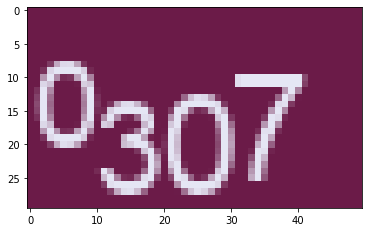

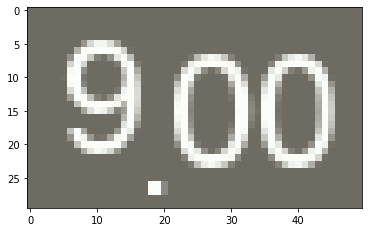

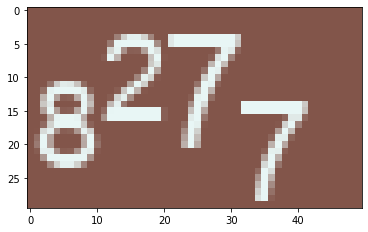

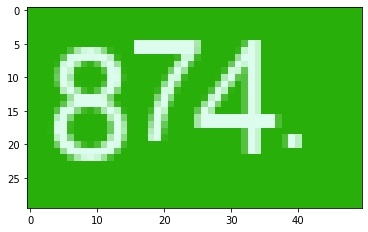

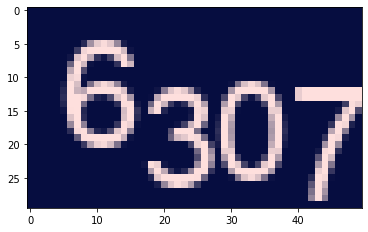

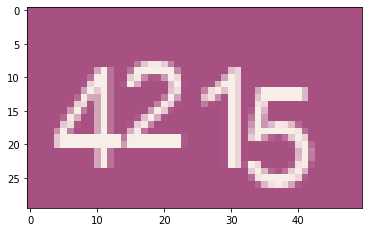

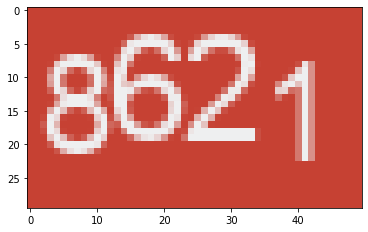

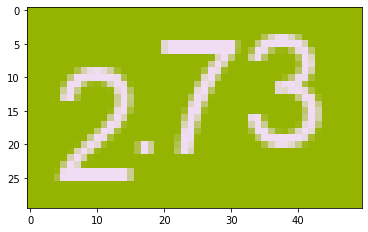

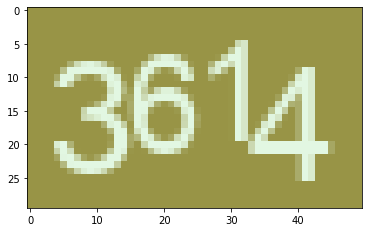

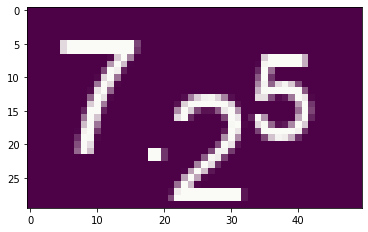

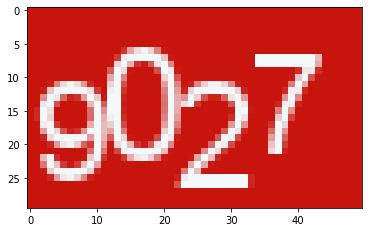

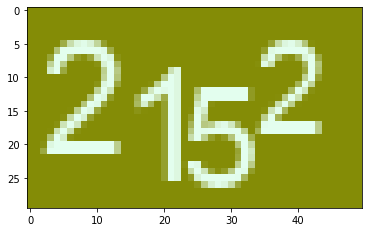

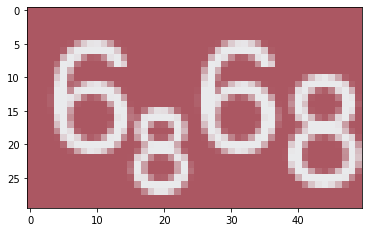

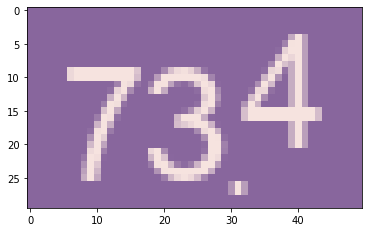

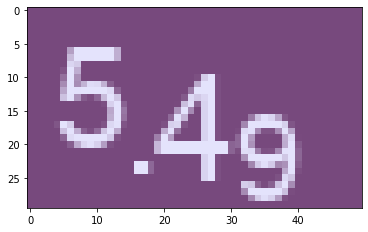

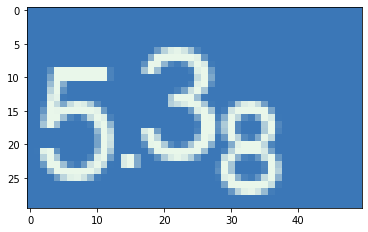

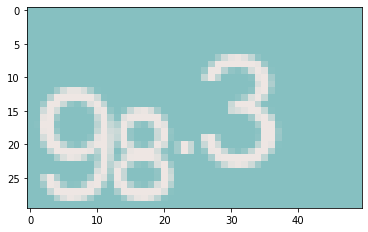

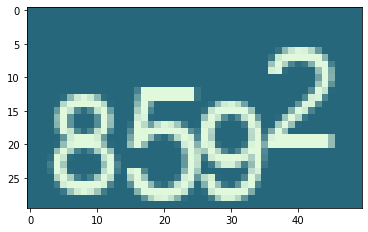

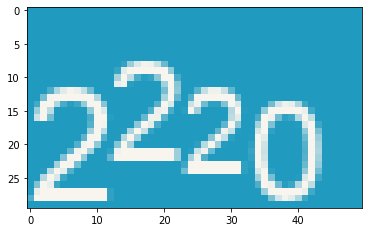

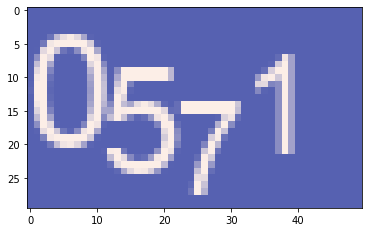

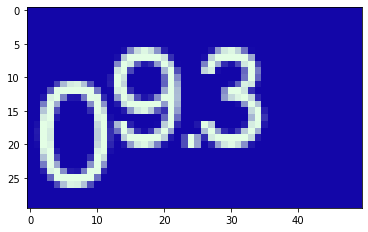

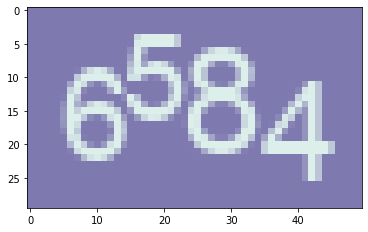

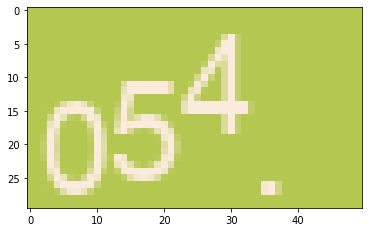

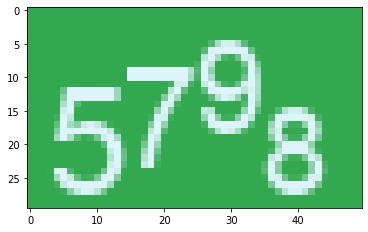

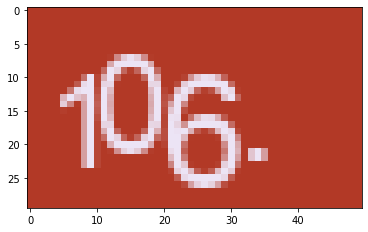

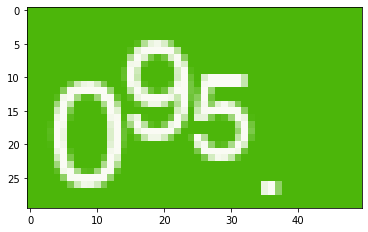

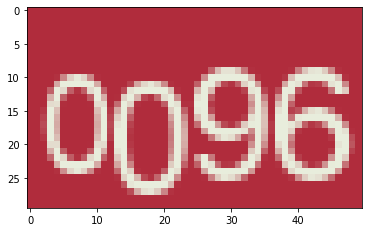

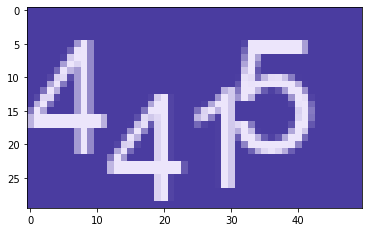

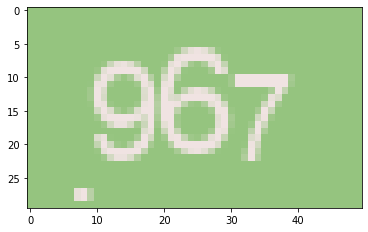

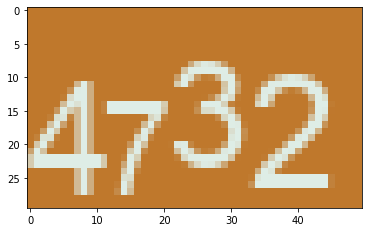

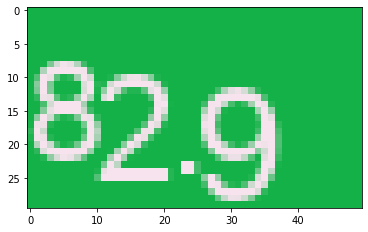

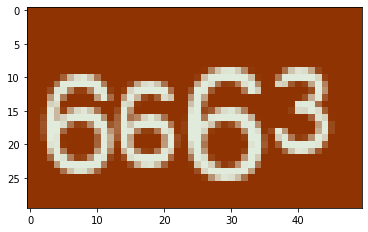

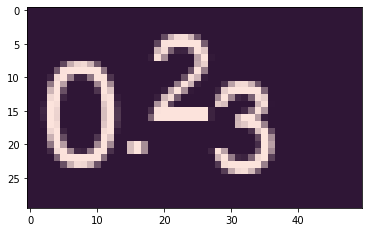

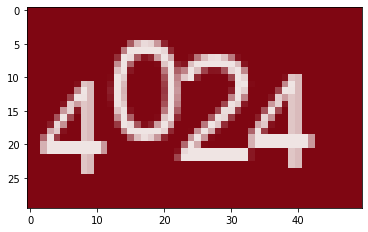

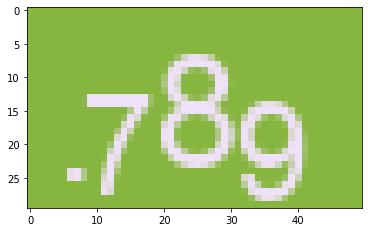

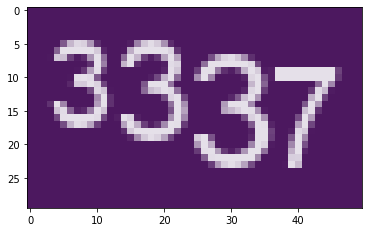

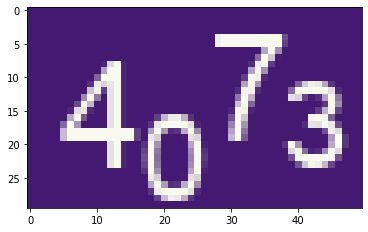

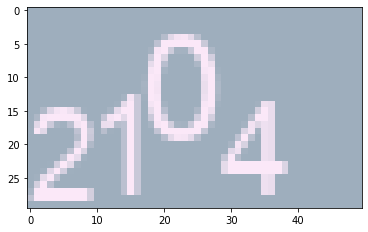

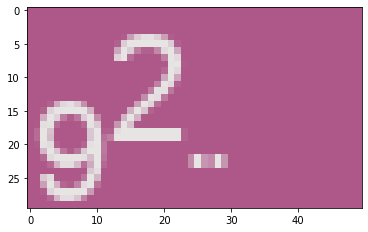

In [297]:
for i in range(40):
    image, bboxes = draw_many_chars(different_coords=True, different_sizes = True, black_chars=False)

    plt.imshow(image)
    plt.show()

getsize (8, 28)
getbbox (0, 28, 8, 28)
(0,) (8, 0)


<ipython-input-76-b40fd28628d2>:19: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(a)


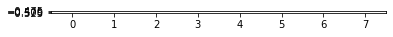

In [76]:
background_color = tuple(np.random.randint(200, size=(3)))


text_color = (255,255,255)
char_to_draw = ' '
font_size = 30

font = ImageFont.truetype("fonts/arial.ttf", font_size)
print('getsize', font.getsize(char_to_draw))
print('getbbox', font.getbbox(char_to_draw))

# plt.imshow(image)
mask = font.getmask(char_to_draw)
# draw_size = font.getsize(char_to_draw)
# actual_size = font.getmask(char_to_draw).size
# print(draw_size,actual_size)
print(np.array(mask).shape, mask.size)
a=np.array(mask).reshape(mask.size[::-1])
plt.imshow(a)

In [ ]:
def draw_many_chars(
    image_size=(50,30),
    font_size_init=25,
    char_num = 4,
    font_path="fonts/arial.ttf",
    different_sizes = False,
    different_coords = False,
    different_colors = False,
    black_chars = False,
    false_targets = False
):
    
    to_draw = random.choices(char_lib, k=char_num)
    
    if black_chars:
        background_color = tuple(np.random.randint(50,255, size=(3)))
        text_low, text_high = 0, 40
    else:
        background_color = tuple(np.random.randint(200, size=(3)))
        text_low, text_high = 220, 255

    image = Image.new('RGB', image_size, color = background_color)
    draw = ImageDraw.Draw(image)
    
    text_color = tuple(np.random.randint(text_low, high=text_high, size=(3), dtype=int))
    if false_targets:
        false_targets_num = np.random.randint(3)
        false_target_1_word = 
    
    bboxes = []
    for i in range(char_num):
        if different_colors:
            text_color = tuple(np.random.randint(text_low, high=text_high, size=(3), dtype=int))
            
        char_to_draw = to_draw[i]
        
        if different_sizes:
            font_size = np.random.randint(font_size_init*0.75, font_size_init)
            if i==0:
                x_start = np.random.randint(image_size[1]*0.2)
        else:
            font_size = font_size_init
            if i==0:
                x_start = 0
                
        font = ImageFont.truetype(font_path, font_size)

        (char_width, char_height) = font.getsize(char_to_draw)
        
        if different_coords:
            x_bias = np.random.randint(max(1, char_width*0.2+1))
            
            y_bias = np.random.randint(max(1, (image_size[1] - char_height)*0.2+1))
#             print(image_size[1], char_height)
        else:
            x_bias = 0
            y_bias = 0
        
        ######## define start pos for char #######
        if i>0:
            last_char_x1 = bboxes[-1][2]
            # break condition
            if last_char_x1 >= image_size[0]:
                return image, bboxes
            
            x_start = last_char_x1 + x_bias
        
            
        y_start = 0 + y_bias
        
        ######### define bbox ##############
        mask = font.getmask(char_to_draw)
        mask=np.array(mask).reshape(mask.size[::-1])
        coords_of_char = np.where(mask!=0)
        y_min_mask, y_max_mask = coords_of_char[0].min(), coords_of_char[0].max()
        x_min_mask, x_max_mask = coords_of_char[1].min(), coords_of_char[1].max()

        x_offset, y_offset = font.getoffset(char_to_draw)

        x0 = x_start + x_offset + x_min_mask
        y0 = y_start + y_offset + y_min_mask
        x1 = x_start + x_offset + x_max_mask
        y1 = y_start + y_offset + y_max_mask

        bbox = [x0, y0, x1, y1, char_to_draw]
        bboxes.append(bbox)
        
        ############# DRAW char ############
        draw.text((x_start, y_start),
                  char_to_draw, 
                  fill=text_color, 
                  font=font)
        last_char_width = char_width
        
    return image, bboxes


image, bboxes = draw_many_chars(different_coords=True, different_sizes = True, black_chars=False)
plt.imshow(image)

#image.save('pil_text.png')
image1 = np.array(image)
for bbox in bboxes:
    image1 = cv2.rectangle(image1, 
                           (bbox[0],bbox[1]), 
                           (bbox[2],bbox[3]), (0,255,0), thickness=1)
plt.imshow(image1)

# Augments

In [12]:
# https://colab.research.google.com/drive/1JuZ23u0C0gx93kV0oJ8Mq0B6CBYhPLXy#scrollTo=aOxbFYRGw43g&forceEdit=true&sandboxMode=true

In [75]:
np.random.randint(0, 1.1)

0

In [13]:
import albumentations as albu
from albumentations.pytorch import ToTensor

BORDER_CONSTANT = 0
BORDER_REFLECT = 2

def pre_transforms(image_size=128):
    # Convert the image to a square of size image_size x image_size
    # (keeping aspect ratio)
    return albu.Compose([
        albu.LongestMaxSize(max_size=image_size),
        albu.PadIfNeeded(image_size, image_size, border_mode=BORDER_CONSTANT, value=0)
    ], bbox_params=albu.BboxParams(format='pascal_voc', label_fields=['labels']))


def hard_transforms():
    return albu.Compose([
        # Random shifts, stretches and turns with a 50% probability
#         albu.ShiftScaleRotate( 
#             shift_limit=0.1,
#             scale_limit=0.1,
#             rotate_limit=30,
#             border_mode=0,
#             value=0,
#             mask_value=0,
#             p=0.5
#         ),
        
        albu.InvertImg(p=0.3),
        albu.HueSaturationValue(p=0.3),
        albu.OneOf([
            albu.IAAAdditiveGaussianNoise(),
            albu.GaussNoise(),
            albu.MultiplicativeNoise(multiplier=[0.5, 1.5], per_channel=True, p=1)
        ], p=0.3),
        albu.OneOf([
            albu.MotionBlur(p=0.2),
            albu.MedianBlur(blur_limit=3, p=0.1),
            albu.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        albu.OneOf([
            albu.CLAHE(clip_limit=2),
            albu.IAASharpen(),
            albu.IAAEmboss(),
            albu.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
            albu.RandomGamma(gamma_limit=(85, 115), p=0.3),
        ], p=0.3),
        albu.JpegCompression(quality_lower=4, quality_upper=100, p=0.5),
        albu.Cutout(num_holes=30, max_h_size=1, max_w_size=1, fill_value=0, p=1),
        ], p=0.9, bbox_params=albu.BboxParams(format='pascal_voc', label_fields=['labels']))

def post_transforms():
    return albu.Compose([
        albu.Normalize(), 
        ToTensor()],
        p=0.9, bbox_params=albu.BboxParams(format='pascal_voc', label_fields=['labels']))

def compose(transforms_to_compose):
    # combine all augmentations into one single pipeline
    return albu.Compose([
      item for sublist in transforms_to_compose for item in sublist
    ])

train_transforms = compose([
    pre_transforms(), 
    hard_transforms(), 
    post_transforms()
])
valid_transforms = compose([pre_transforms(), post_transforms()])

show_transforms = compose([pre_transforms(), hard_transforms()])

# Dataset classes

In [14]:
class Dataset_one_PIL_digit(Dataset):
    def __init__(self, label_dict, size_of_dataset=1000, transforms=None) -> None:
        self.transforms = transforms
        self.size_of_dataset = size_of_dataset
        

    def __len__(self) -> int:
        return self.size_of_dataset

    def __getitem__(self, idx: int) -> dict:
        image, label = draw_one_char(image_size=(20,20), 
                  font_size_init=20, 
                  font_path="fonts/arial.ttf", 
                  different_sizes = True)
        
        result = {"image": image, "label": label}
        
        if self.transforms is not None:
            result = self.transforms(**result)
        
        return result

In [15]:
class Dataset_many_PIL_digits(Dataset):
    def __init__(self, label_dict, size_of_dataset=1000, transforms=None) -> None:
        self.transforms = transforms
        self.size_of_dataset = size_of_dataset
        
    def __len__(self) -> int:
        return self.size_of_dataset

    def __getitem__(self, idx: int) -> dict:
        image, label = draw_many_chars(
                            image_size=(80,20),
                            font_size_init=20,
                            char_num = 4,
                            font_path="fonts/arial.ttf",
                            different_sizes = True,
                            different_coords = True,
                        )
        
        result = {"image": image, "label": label}
        
        if self.transforms is not None:
            result = self.transforms(**result)
        
        return result

In [16]:
"""
черные пиксели только по поверхности цифры (трешолд по белому цвету и cutout)

у 1 и 7ки сделать семлирование побольше(вероятности появления сделать выше средних)


"""

'\nчерные пиксели только по поверхности цифры (трешолд по белому цвету и cutout)\n\nу 1 и 7ки сделать семлирование побольше(вероятности появления сделать выше средних)\n\n\n'

# SHOW

In [17]:
transform = compose([hard_transforms()])

20


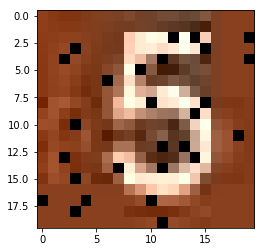

In [19]:
image = draw_one_char(image_size=(20,20),font_size_init=20)
outp = transform(image=np.array(image))['image']
plt.imshow(outp)

# Some shit

In [3]:

def text(
        self,
        xy,
        text,
        fill=None,
        font=None,
        anchor=None,
        spacing=4,
        align="left",
        direction=None,
        features=None,
        language=None,
        stroke_width=0,
        stroke_fill=None,
        embedded_color=False,
        *args,
        **kwargs,
    ):
        if self._multiline_check(text):
            return self.multiline_text(
                xy,
                text,
                fill,
                font,
                anchor,
                spacing,
                align,
                direction,
                features,
                language,
                stroke_width,
                stroke_fill,
                embedded_color,
            )

        if embedded_color and self.mode not in ("RGB", "RGBA"):
            raise ValueError("Embedded color supported only in RGB and RGBA modes")

        if font is None:
            font = self.getfont()

        def getink(fill):
            ink, fill = self._getink(fill)
            if ink is None:
                return fill
            return ink

        print(ink)

        def draw_text(ink, stroke_width=0, stroke_offset=None):
            mode = self.fontmode
            if stroke_width == 0 and embedded_color:
                mode = "RGBA"
            coord = xy
            try:
                mask, offset = font.getmask2(
                    text,
                    mode,
                    direction=direction,
                    features=features,
                    language=language,
                    stroke_width=stroke_width,
                    anchor=anchor,
                    ink=ink,
                    *args,
                    **kwargs,
                )
                coord = coord[0] + offset[0], coord[1] + offset[1]
            except AttributeError:
                try:
                    mask = font.getmask(
                        text,
                        mode,
                        direction,
                        features,
                        language,
                        stroke_width,
                        anchor,
                        ink,
                        *args,
                        **kwargs,
                    )
                except TypeError:
                    mask = font.getmask(text)
            if stroke_offset:
                coord = coord[0] + stroke_offset[0], coord[1] + stroke_offset[1]
            if mode == "RGBA":
                # font.getmask2(mode="RGBA") returns color in RGB bands and mask in A
                # extract mask and set text alpha
                color, mask = mask, mask.getband(3)
                color.fillband(3, (ink >> 24) & 0xFF)
                coord2 = coord[0] + mask.size[0], coord[1] + mask.size[1]
                self.im.paste(color, coord + coord2, mask)
            else:
                self.draw.draw_bitmap(coord, mask, ink)

        ink = getink(fill)
        if ink is not None:
            stroke_ink = None
            if stroke_width:
                stroke_ink = getink(stroke_fill) if stroke_fill is not None else ink

            if stroke_ink is not None:
                # Draw stroked text
                draw_text(stroke_ink, stroke_width)

                # Draw normal text
                draw_text(ink, 0)
            else:
                # Only draw normal text
                draw_text(ink)

In [22]:
font_path="fonts/arial.ttf"
font = ImageFont.truetype(font_path, 14)

from PIL import Image, ImageDraw, ImageFont

img = Image.new('RGB', (100, 30), color = (73, 109, 137))

draw = ImageDraw.Draw(img)
# draw.text = A.text
draw.text(None, (0,10), "Hello World", fill=(255,255,0))

plt.imshow(img)
# # img.save('pil_text.png')

TypeError: text() got multiple values for argument 'fill'

(75, 67) (75, 56)


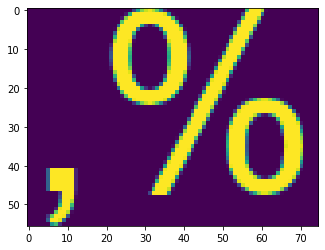

In [99]:
font_path=r"fonts/arial.ttf"
font = ImageFont.truetype(font_path, 64)
char_to_draw = ',%'
mask = font.getmask(char_to_draw)
draw_size = font.getsize(char_to_draw)
actual_size = font.getmask(char_to_draw).size
print(draw_size,actual_size)
a=np.array(mask).reshape(mask.size[::-1])
plt.imshow(a)

In [42]:
(char_width, char_height) = font.getsize(char_to_draw)
(char_width, char_height)

(11, 13)

In [ ]:
draw = ImageDraw.Draw(image)
    draw.text((x_coord, y_coord), 
              char_to_draw, 
              fill=text_color, 
              font=font,
             stroke_width=0) 

# NEW GENERATION

[55, 52, 101, 104, 0]


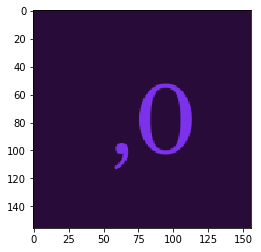

In [2]:
class Number_Generator:
    def __init__(self, fonts_dir=r'Z:\WORK2\Numbers_generator\fonts'):
        self.true_alphabet = '0123456789'
        self.trash_alphabet = '+-=#*%$№@'
        self.alphabet = self.true_alphabet + self.trash_alphabet
        self.true_prob = 1 / 11
        self.trash_prob = 1 / 11 / len(self.trash_alphabet)
        self.probs = [self.true_prob for _ in range(len(self.true_alphabet))] + \
                     [self.trash_prob for _ in range(len(self.trash_alphabet))]
        self.indexes = np.arange(len(self.alphabet))
        self.Fonts = self._get_fonts(fonts_dir)

    def _get_fonts(self, fonts_dir):
        py = pathlib.Path(fonts_dir).glob("*.ttf")
        Fonts = []
        for file in py:
            Fonts.append(ImageFont.truetype(str(file), 64))
        return Fonts

    def Get_item(self,
                 char_to_crop_size=0.5,
                 prob_to_add_dots=0.2):

        ind = np.random.choice(self.indexes, 1, p=self.probs)[0]
        char_to_draw = self.alphabet[ind]
        true_label = char_to_draw
        ####### SIZE CHOICE ########

        font = np.random.choice(self.Fonts)
        draw_size = font.getsize(char_to_draw)
        actual_size = font.getmask(char_to_draw).size

        if actual_size[0] > actual_size[1]:  # x > y
            _max = actual_size[0]
        else:
            _max = actual_size[1]
        image_size = int(_max / char_to_crop_size * 2 - _max)
        if image_size<100:
            image_size=128

        ####### Coordinates to draw ######
        # drawing adds some pixels from up and 0 or 1 from down
        y_bias = draw_size[1] - actual_size[1]

        x_min = int((image_size - actual_size[0]) / 2)
        y_min = int((image_size - actual_size[1]) / 2) - y_bias

        ##### COLOR CHOICE #####
        R, G, B = np.random.randint(255, size=(3))
        R_char = np.random.choice(np.delete(np.arange(255), np.s_[R - 50:R + 50]))
        G_char = np.random.choice(np.delete(np.arange(255), np.s_[G - 50:G + 50]))
        B_char = np.random.choice(np.delete(np.arange(255), np.s_[B - 50:B + 50]))
        background_color = (R, G, B)
        text_color = (R_char, G_char, B_char)

        image = Image.new('RGB', (image_size, image_size), color=background_color)

        ###### ADD random dots to char ####
        if np.random.rand() < prob_to_add_dots:
            adding = random.choice('.,:\'')
            char_to_draw = adding + char_to_draw
        if np.random.rand() < prob_to_add_dots:
            adding = random.choice('.,:\'')
            char_to_draw = char_to_draw + adding

        draw = ImageDraw.Draw(image)
        draw.text((x_min, y_min), char_to_draw, fill=text_color, font=font, stroke_width=0)

        # BBOX [x_min, y_min, width, height] format = 'pascal_voc'
        label = int(true_label) if true_label in self.true_alphabet else 10
        bbox = [x_min, y_min + y_bias, actual_size[0] + x_min, actual_size[1] + y_min + y_bias, label]
        
        assert image.size[0]>64 , f'{font.path}'
        assert actual_size[0]>0 and actual_size[1]>0, f'{font.path}, char={char_to_draw},bbox={bbox}, actual_size={actual_size} '
        
        return image, bbox

    
Generator = Number_Generator()
img, bbox = Generator.Get_item(char_to_crop_size = 0.5)
print(bbox)
plt.imshow(img)

In [3]:
import albumentations as albu
from albumentations.pytorch import ToTensor

BORDER_CONSTANT = 0
BORDER_REFLECT = 2

def pre_transforms(image_size=64):
    # Convert the image to a square of size image_size x image_size
    # (keeping aspect ratio)
    return albu.Compose([
        albu.CenterCrop(image_size+20,image_size+20),
        albu.LongestMaxSize(max_size=image_size),
        albu.PadIfNeeded(image_size, image_size, border_mode=BORDER_CONSTANT, value=0)
    ], bbox_params=albu.BboxParams(format='pascal_voc'))


def hard_transforms():
    return albu.Compose([
        albu.Rotate(limit=30, interpolation=cv2.INTER_LINEAR, border_mode=cv2.BORDER_CONSTANT, value=(0,0,0)),
        albu.RandomSizedBBoxSafeCrop(width=64, height=64, erosion_rate=0.2),
        albu.InvertImg(p=0.3),
        albu.HueSaturationValue(p=0.3),
        albu.OneOf([
            albu.IAAAdditiveGaussianNoise(),
            albu.GaussNoise(),
            albu.MultiplicativeNoise(multiplier=[0.5, 1.5], per_channel=True, p=1)
        ], p=0.3),
        albu.OneOf([
            albu.MotionBlur(p=0.2),
            albu.MedianBlur(blur_limit=3, p=0.1),
            albu.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        albu.OneOf([
            albu.CLAHE(clip_limit=2),
            albu.IAASharpen(),
            albu.IAAEmboss(),
            albu.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
            albu.RandomGamma(gamma_limit=(85, 115), p=0.3),
        ], p=0.3),
        albu.JpegCompression(quality_lower=30, quality_upper=100, p=0.5),
        albu.Cutout(num_holes=10, max_h_size=5, max_w_size=5, fill_value=0, p=0.5),
        ], p=1, bbox_params=albu.BboxParams(format='pascal_voc'))

def post_transforms():
    return albu.Compose([
        albu.Normalize(),
        ToTensor()],
        p=1, bbox_params=albu.BboxParams(format='pascal_voc'))

train_transforms = albu.Compose([
    hard_transforms(),
    post_transforms()
])

train_transforms = albu.Compose([
    hard_transforms(),
    post_transforms()
])

valid_transforms = albu.Compose([pre_transforms(), post_transforms()])

show_transforms = albu.Compose([pre_transforms(), hard_transforms()])

In [4]:
class Dataset_one_PIL_digit(Dataset):
    def __init__(self, transforms=None, size_of_dataset=1000) -> None:
        self.transforms = transforms
        self.size_of_dataset = size_of_dataset
        self.Generator = Number_Generator()

    def __len__(self) -> int:
        return self.size_of_dataset

    def __getitem__(self, idx: int) -> dict:
        img, bbox = self.Generator.Get_item(char_to_crop_size=0.5)

        result = {"image": np.array(img), "bboxes": [bbox]}
        print(bbox)
        print(img.size)
        if self.transforms is not None:
            result = self.transforms(**result)
        result['label'] = bbox[-1]

        return result

In [38]:
train_transforms = albu.Compose([
    hard_transforms(),
    post_transforms()
])

In [41]:
cls = Dataset_one_PIL_digit(transforms = train_transforms)

In [42]:
for i in range(200):
    a = cls[i]
#     plt.imshow(a['image'])
    print(a['label'])
#     plt.show()

[53, 47, 88, 94, 2]
(141, 141)
2
[45, 42, 80, 84, 3]
(126, 126)
3
[44, 42, 82, 84, 4]
(126, 126)
4
[57, 52, 98, 104, 6]
(156, 156)
6
[57, 62, 114, 108, 8]
(171, 171)
8
[36, 38, 72, 69, 10]
(108, 108)
10
[53, 50, 96, 100, 10]
(150, 150)
10
[57, 51, 96, 102, 2]
(153, 153)
2
[53, 48, 91, 96, 4]
(144, 144)
4
[54, 52, 102, 104, 0]
(156, 156)
0
[56, 50, 94, 100, 2]
(150, 150)
2
[54, 48, 89, 96, 8]
(144, 144)
8
[51, 46, 87, 92, 5]
(138, 138)
5
[52, 47, 88, 94, 9]
(141, 141)
9
[45, 42, 80, 84, 5]
(126, 126)
5
[55, 49, 92, 98, 4]
(147, 147)
4
[54, 48, 89, 96, 6]
(144, 144)
6
[47, 43, 82, 86, 5]
(129, 129)
5
[58, 51, 95, 102, 4]
(153, 153)
4
[54, 50, 95, 100, 10]
(150, 150)
10
[51, 42, 74, 84, 10]
(126, 126)
10
[57, 50, 93, 100, 9]
(150, 150)
9
[52, 47, 88, 94, 8]
(141, 141)
8
[51, 46, 87, 92, 1]
(138, 138)
1
[53, 47, 88, 94, 2]
(141, 141)
2
[58, 50, 91, 100, 3]
(150, 150)
3
[61, 51, 92, 102, 1]
(153, 153)
1
[54, 48, 89, 96, 3]
(144, 144)
3
[51, 46, 86, 92, 7]
(138, 138)
7
[45, 42, 80, 84, 6]
(1

# LOADERS

In [43]:
import collections

def get_loaders(
    train_transforms_fn,
    valid_transforms_fn,
    batch_size: int = 64, 
    num_workers: int = 4,
    sampler = None
) -> collections.OrderedDict:
    """
    Args:
        train_transforms_fn: Augmentor for train part
        valid_transforms_fn: Augmentor for valid part
        batch_size: batch size
        num_workers: How many subprocesses to use to load data,
        sampler: An object of the torch.utils.data.Sampler class 
            for the dataset data sampling strategy specification
    """
    
    Train_DS = Dataset_one_PIL_digit(transforms=train_transforms)
    Test_DS = Dataset_one_PIL_digit(transforms=valid_transforms)
    
    train_loader = DataLoader(Train_DS, 
                                   batch_size=batch_size, 
                                   num_workers=num_workers,
                                   shuffle=False,
                                   sampler = sampler, 
                                   drop_last=True)

    valid_loader = DataLoader(Test_DS, 
                                  batch_size=batch_size, 
                                  num_workers=num_workers)
    

    # Catalyst expects an ordered dictionary with train/valid/infer loaders. 
    # The number of loaders can vary.
    # For example, it can easily handle even some complex logic like:
    # loaders["train_dataset1"] = train_loader_1
    # loaders["train_dataset2"] = train_loader_2
    # ....
    # loaders["valid_1"] = valid_loader_1
    # loaders["valid_2"] = valid_loader_2
    # ...
    # loaders["infer_1"] = infer_loader_1
    # loaders["infer_2"] = infer_loader_2
    # ...
    
    loaders = collections.OrderedDict()
    loaders["train"] = train_loader
    loaders["valid"] = valid_loader

    return loaders

In [44]:
Loaders = get_loaders(train_transforms, valid_transforms, num_workers= 0)

In [45]:
L = Loaders['train']

batch = next(iter(L))
batch.shape

[49, 45, 85, 90, 7]
(135, 135)
[57, 50, 92, 100, 8]
(150, 150)
[53, 48, 90, 96, 0]
(144, 144)
[54, 48, 89, 96, 6]
(144, 144)
[57, 51, 96, 102, 2]
(153, 153)
[49, 45, 85, 90, 4]
(135, 135)
[56, 52, 99, 104, 6]
(156, 156)
[48, 44, 84, 88, 1]
(132, 132)
[50, 46, 87, 92, 4]
(138, 138)
[47, 43, 81, 86, 6]
(129, 129)
[51, 46, 87, 92, 5]
(138, 138)
[54, 48, 89, 96, 6]
(144, 144)
[56, 49, 91, 98, 2]
(147, 147)
[47, 43, 82, 86, 9]
(129, 129)
[57, 52, 98, 104, 9]
(156, 156)
[50, 46, 87, 92, 4]
(138, 138)
[48, 44, 84, 88, 2]
(132, 132)
[34, 35, 68, 67, 10]
(102, 102)
[53, 54, 74, 73, 10]
(128, 128)
[54, 48, 89, 96, 3]
(144, 144)
[46, 42, 79, 84, 2]
(126, 126)
[50, 46, 87, 92, 4]
(138, 138)
[45, 42, 80, 84, 5]
(126, 126)
[49, 45, 85, 90, 4]
(135, 135)
[53, 48, 90, 96, 0]
(144, 144)
[51, 46, 87, 92, 7]
(138, 138)
[53, 48, 90, 96, 0]
(144, 144)
[52, 42, 74, 84, 1]
(126, 126)
[58, 48, 86, 96, 1]
(144, 144)
[46, 43, 82, 86, 8]
(129, 129)
[46, 43, 82, 86, 0]
(129, 129)
[49, 45, 85, 90, 7]
(135, 135)
[5

AttributeError: 'dict' object has no attribute 'shape'

In [49]:
batch['image'].shape, batch['label']

(torch.Size([64, 3, 64, 64]),
 tensor([ 7,  8,  0,  6,  2,  4,  6,  1,  4,  6,  5,  6,  2,  9,  9,  4,  2, 10,
         10,  3,  2,  4,  5,  4,  0,  7,  0,  1,  1,  8,  0,  7,  4,  7,  8,  4,
          1,  2,  0,  3,  9,  9,  5,  2,  4,  1,  7,  8,  6,  1, 10,  8,  9,  4,
          3,  7,  7,  1,  2,  1,  4, 10,  3,  8]))